In [16]:
import pandas as pd

# song count we want to use for a run. Good Sample size: 1000 - 10000, full size: 89741
song_count = 1000
cluster_count = int(song_count/10)

data = pd.read_csv("./data/dataset.csv", usecols=['energy', 'valence', 'tempo', 'danceability', 'speechiness', 'track_id', 'track_name', 'artists', 'track_genre'])
subset_with_id_and_name = data.sample(song_count)
subset = subset_with_id_and_name[['energy','valence','tempo','danceability','speechiness']]

In [17]:
print(len(subset))
display(subset.head(10))

1000


,energy,valence,tempo,danceability,speechiness
51943,0.733,0.395,97.971,0.824,0.0614
107892,0.958,0.629,161.330,0.577,0.0696
10472,0.920,0.886,131.028,0.662,0.0659
4212,0.341,0.113,78.895,0.182,0.0337
17393,0.839,0.535,110.005,0.778,0.0944
24077,0.979,0.674,124.011,0.871,0.0756
2912,0.217,0.179,128.220,0.426,0.0401
96468,0.691,0.568,150.036,0.464,0.0330
106107,0.788,0.520,126.150,0.454,0.0371
5837,0.617,0.514,87.404,0.621,0.3740


## Plot Subset
### The Plots are not accurate anymore as we increased the number of columns from 3 to 5 but didn't update the plots afterwards

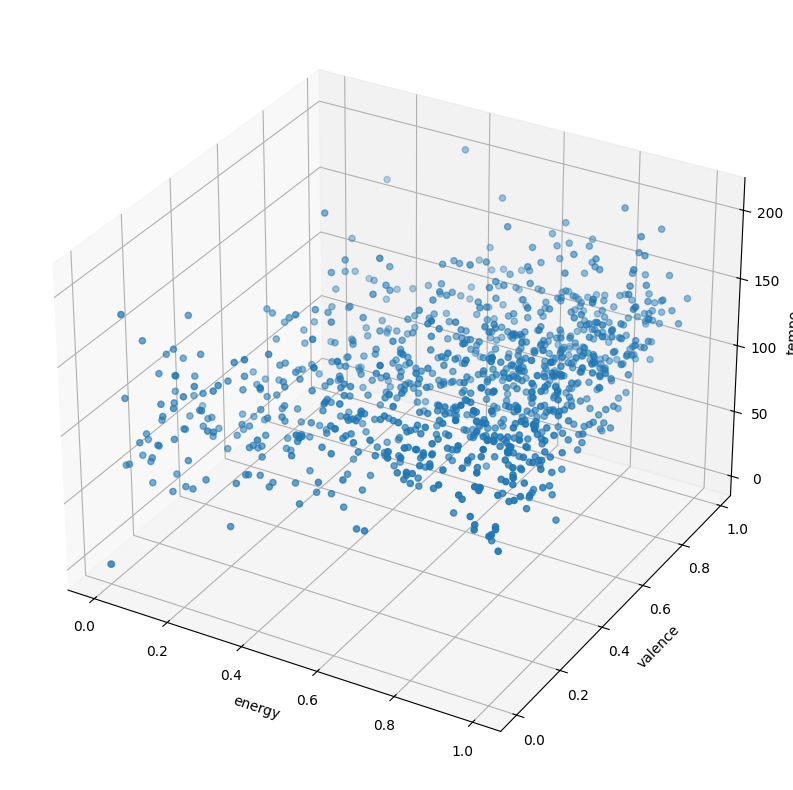

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(subset['energy'], subset['valence'], subset['tempo'])


ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Normalizing the data (Min Max Norming)

In [19]:
from sklearn import preprocessing

norm_subset = subset

norm_subset = (norm_subset - norm_subset.min()) / (norm_subset.max() - norm_subset.min())
print(norm_subset.head(10))
X_train_norm = norm_subset


          energy   valence     tempo  danceability  speechiness
51943   0.734423  0.402650  0.470052      0.853002     0.064700
107892  0.959913  0.641182  0.774040      0.597308     0.073340
10472   0.921830  0.903160  0.628655      0.685300     0.069442
4212    0.341569  0.115189  0.378528      0.188406     0.035511
17393   0.840654  0.545362  0.527789      0.805383     0.099473
24077   0.980959  0.687054  0.594988      0.901656     0.079663
2912    0.217299  0.182467  0.615182      0.440994     0.042255
96468   0.692331  0.579001  0.719853      0.480331     0.034773
106107  0.789543  0.530071  0.605251      0.469979     0.039094
5837    0.618170  0.523955  0.419353      0.642857     0.394099


## Plot normalized Data
### The Plots are not accurate anymore as we increased the number of columns from 3 to 5 but didn't update the plots afterwards

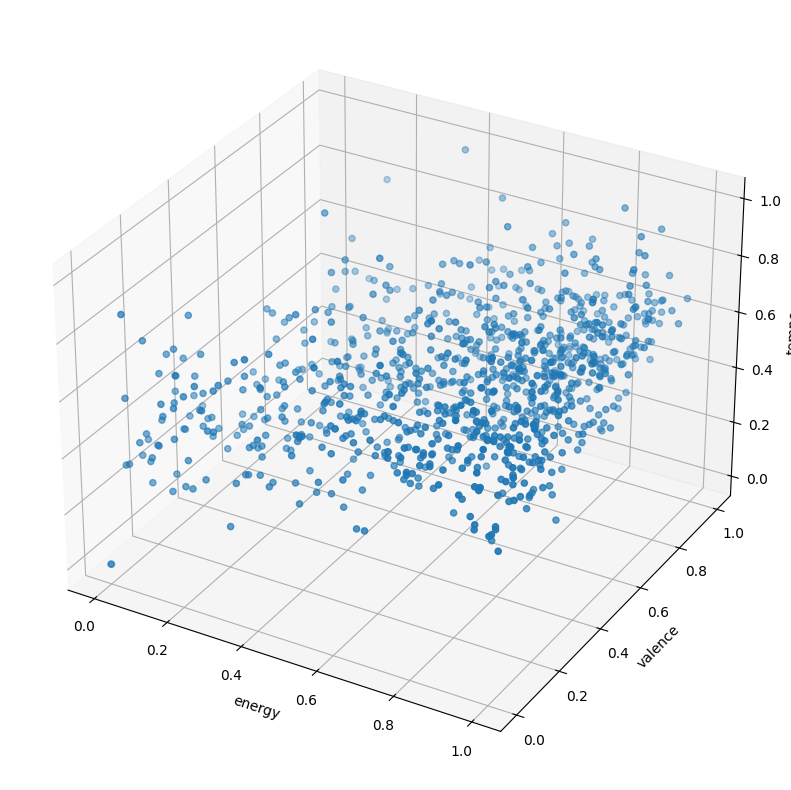

In [20]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(norm_subset['energy'], norm_subset['valence'], norm_subset['tempo'])

ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Generating random Entry from normalized data sample for testing purpose

In [21]:
X_train_norm['org_index'] = subset_with_id_and_name.index
start_value = X_train_norm.sample(1)
print(start_value)

         energy   valence     tempo  danceability  speechiness  org_index
82788  0.894771  0.896024  0.857316      0.278468     0.041834      82788


## KMeans Clustering

In [22]:
def get_cluster(data, labels, start_label):
    cluster_points = data[labels == start_label]
    return cluster_points

In [23]:

from sklearn.cluster import KMeans
from tabulate import tabulate

# initiate kmeans
kmeans = KMeans(n_clusters = cluster_count, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

start_label = kmeans.predict(start_value)
labels = kmeans.labels_

# get cluster containing the start song
cluster_points = get_cluster(X_train_norm, labels, start_label)

original_indices = cluster_points['org_index']

print_table_kMeans = []
value_list_kMeans = []

# save song data in lists
# print_table_kMeans contains artist name and genre
# value_list_kMeans contains the actual values for each data column (energy, valence, ...)
for index in original_indices:
    print_table_kMeans.append([subset_with_id_and_name.loc[index].artists, subset_with_id_and_name.loc[index].track_name, subset_with_id_and_name.loc[index].track_genre])
    value_list_kMeans.append([X_train_norm.loc[index].energy, X_train_norm.loc[index].valence, X_train_norm.loc[index].tempo, X_train_norm.loc[index].danceability, X_train_norm.loc[index].speechiness])
    
# print kmeans output cluster
print(tabulate(print_table_kMeans, headers=['Artists','Trackname','Genre'])) 


Artists                           Trackname                                                        Genre
--------------------------------  ---------------------------------------------------------------  -----------------
Elvis Costello & The Attractions  Busy Bodies                                                      power-pop
that dog.                         Gagged And Tied                                                  power-pop
The Replacements                  Swingin Party - 2008 Remaster                                    power-pop
XTC                               Generals And Majors - 2001 Remaster                              power-pop
Groovie Ghoulies                  Til Death Do Us Party                                            power-pop
Alejandro Escovedo                Bottom Of The World                                              power-pop
Elvis Costello & The Attractions  The Imposter                                                     power-pop
Squeeze        

In [24]:
print(original_indices)

82830    82830
82609    82609
82517    82517
82542    82542
82884    82884
82532    82532
82633    82633
82799    82799
82429    82429
83000    83000
82934    82934
82431    82431
82670    82670
83171    83171
83246    83246
82726    82726
82788    82788
Name: org_index, dtype: int64


# Nearest Neighbours

In [25]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

samples = X_train_norm.values

# inititate nearest neighbor
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(samples)

# cluster around starting song
neighbour_indizes = neigh.kneighbors(start_value.to_numpy(), 10, return_distance=False)
    
print(neighbour_indizes)

[[997 441 126 979 288 717 514 397 138 513]]


## Extract Songs via indizes

In [26]:
print_table_kNearest = []
value_list_kNearest = []
org_indices_kNearest = []

# Get original indices
for index in neighbour_indizes:
    org_indices_kNearest.append(subset_with_id_and_name.iloc[index].index)

org_indices_kNearest = org_indices_kNearest[0]
print(org_indices_kNearest)

# save song data in lists
# print_table_kMeans contains artist name and genre
# value_list_kMeans contains the actual values for each data column (energy, valence, ...)
for index in org_indices_kNearest:
    print_table_kNearest.append([subset_with_id_and_name.loc[index].artists, subset_with_id_and_name.loc[index].track_name, subset_with_id_and_name.loc[index].track_genre])
    value_list_kNearest.append([X_train_norm.loc[index].energy, X_train_norm.loc[index].valence, X_train_norm.loc[index].tempo, X_train_norm.loc[index].danceability, X_train_norm.loc[index].speechiness])

Index([82788, 82799, 82830, 82726, 82884, 82670, 82934, 82633, 82609, 83000], dtype='int64')


## Calculating ndcg Score

In [27]:
import numpy as np
from sklearn.metrics import ndcg_score

print(start_value)

# ground truth = energy, valence, tempo, danceability, speechiness of starting song
start_value_array = [[start_value.iloc[0]['energy'], start_value.iloc[0]['valence'], start_value.iloc[0]['tempo'], start_value.iloc[0]['danceability'], start_value.iloc[0]['speechiness']]]

score_array_kMeans = []
# calculating ndcg score for KMeans list
for entry in value_list_kMeans:
    score_array_kMeans.append(ndcg_score(start_value_array, [entry]))

score_array_kNearest = []
# calculating ndcg score for KNearest list
for entry in value_list_kNearest:
    score_array_kNearest.append(ndcg_score(start_value_array, [entry]))
    
# Calc average of kMeans Scores
avg_kMeans = sum(score_array_kMeans) / len(score_array_kMeans)

# Calc average of kNearest Scores
avg_kNearest = sum(score_array_kNearest) / len(score_array_kNearest)

# print overall results with comparison of both algorithms
print("Starting Track")
print(tabulate(subset_with_id_and_name.loc[start_value.org_index]))

print("\n\nKNearest Neighbours")
print(tabulate(print_table_kNearest, headers=['Artists','Trackname','Genre']))  

print("\n\nKMeans Clustering")
print(tabulate(print_table_kMeans, headers=['Artists','Trackname','Genre']))

print("\n\nAverage scores of kMeans and kNearest")
print("kMeans:", round(avg_kMeans, 3))
print("kNearest:", round(avg_kNearest, 3))

         energy   valence     tempo  danceability  speechiness  org_index
82788  0.894771  0.896024  0.857316      0.278468     0.041834      82788
Starting Track
-----  ----------------------  ----------  -----------------  -----  -----  ------  -----  -------  ---------
82788  4Rfh6I1TAB7vXCK0A6k8sH  The Queers  Born To Do Dishes  0.269  0.893  0.0397  0.879  178.687  power-pop
-----  ----------------------  ----------  -----------------  -----  -----  ------  -----  -------  ---------


KNearest Neighbours
Artists                           Trackname                     Genre
--------------------------------  ----------------------------  -----------------
The Queers                        Born To Do Dishes             power-pop
Squeeze                           Is That Love?                 power-pop
Elvis Costello & The Attractions  Busy Bodies                   power-pop
Dinosaur Jr.                      How'd You Pin That One On Me  power-pop
Groovie Ghoulies                  Til